# Step 1: Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_diabetes

# Step 2: Load the Diabetes Dataset

In [4]:
diabetes = load_diabetes()
dataset = pd.DataFrame(data= diabetes.data, columns= diabetes.feature_names)

In [5]:
dataset['target'] = diabetes.target

In [6]:
dataset.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


# Step 3: Prepare the Data

In [8]:
dataset.isnull().sum() # check for null values

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

### taking only age and bmi for simplicity

In [25]:
X= dataset[['age', 'bmi']]   #age, bmi
y= (dataset.target >140).astype(int)  #target and changing it to binary 

In [28]:
X.head()

,age,bmi
0,0.038076,0.061696
1,-0.001882,-0.051474
2,0.085299,0.044451
3,-0.089063,-0.011595
4,0.005383,-0.036385


In [29]:
y.head()

0    1
1    0
2    1
3    1
4    0
Name: target, dtype: int32

## Split the data into training and testing sets

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize Features
The code involves using the StandardScaler from scikit-learn to
standardize the features of the dataset. Standardization is a preprocessing
step that scales the features to have a mean of 0 and a standard deviation
of 1. This is important for algorithms like K-Nearest Neighbors (KNN) that
rely on distance measures because it ensures that all features contribute
equally to the distance computation.

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Choose the Value of K

In [32]:
k_value = 3

# Step 6: Create and Train the KNN Model

In [34]:
knn_model = KNeighborsClassifier(n_neighbors=k_value)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

# Step 7: Make Predictions

In [35]:
y_pred = knn_model.predict(X_test_scaled)

# Step 8: Visualize Training Set Results:

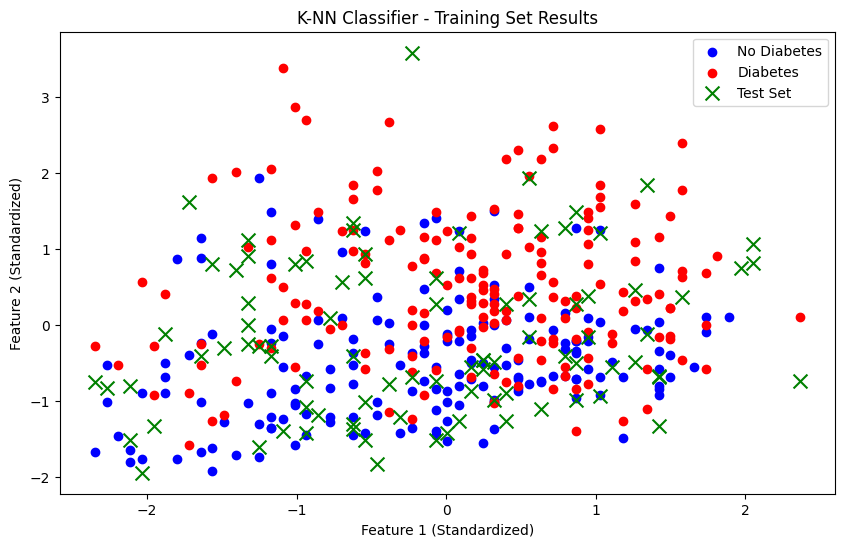

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train_scaled[y_train == 0, 0], X_train_scaled[y_train == 0, 1], color='blue', label='No Diabetes')
plt.scatter(X_train_scaled[y_train == 1, 0], X_train_scaled[y_train == 1, 1], color='red', label='Diabetes')
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], color='green', label='Test Set', marker='x', s=100)
plt.title('K-NN Classifier - Training Set Results')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()
plt.show()